# Mount Google Drive and Set Up Colab Environment
If you have subscribed to Colab Pro, please change the runtime type to "A100 GPU". Each notebook will consume ~ 1 compute unit. Running the LLM on Colab's free CPU will be slow.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set Google Drive and Colab Virtual Machine Path - Modify if Necessary.
FolderPath_GDrive = "/content/drive/Shared drives/AI Winter School (Brown Physics CFPU 2025)/Module 7 -- Generative AI with Industrial Applications/SFL_ReAct_PhysicsResearchAssistant/"
FolderPath_Colab = "/content/SFL_ReAct_PhysicsResearchAssistant"

# Copy the Folder for this Module from Google Drive to the Colab Virtual Machine.
!cp -r "$FolderPath_GDrive" "/content"

# Install the Packages
fPath_Req = FolderPath_Colab + "/requirements.txt"
!pip install -r "$fPath_Req"

# Install and Load the xterm Extension to Use a Terminal Within a Colab Notebook.
!pip install colab-xterm
%load_ext colabxterm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Embeddings

---





In [ ]:
# Can be replace by any embedding model of your choosing.
# Often one finetuned on data similar to that of your application

from langchain_community.embeddings import GPT4AllEmbeddings
embedding_model = GPT4AllEmbeddings()

In [ ]:
test_string_1 = "This is a test text string."
test_embedding_1 = embedding_model.embed_query(test_string_1)

In [ ]:
print(f"The string {test_string_1} is embedded as a vector: {test_embedding_1}")
print(f"The vector embedding of {test_string_1} has length: {len(test_embedding_1)}")

The string This is a test text string. is embedded as a vector: [0.01980212703347206, 0.07780062407255173, -0.04922031611204147, 0.02364633046090603, -0.06676992774009705, -0.024346351623535156, 0.06235085800290108, 0.04872960224747658, 0.012131079100072384, -0.024533551186323166, 0.10209076851606369, -0.022941602393984795, 0.04314935579895973, -0.0005357681657187641, -0.011375869624316692, 0.0018137699225917459, -0.010201886296272278, -0.10592278093099594, -0.02593456767499447, 0.0030056352261453867, 0.04798433557152748, 0.08617385476827621, -0.040782373398542404, 0.021085064858198166, 0.04995645582675934, 0.06535268574953079, -0.06000298634171486, 0.043331630527973175, 0.05959556996822357, 0.012107371352612972, -0.018696775659918785, 0.027209673076868057, 0.06977629661560059, 0.05441061034798622, 0.06950011849403381, 0.02167455106973648, -0.018337609246373177, 0.0024543043691664934, 0.03231007233262062, 0.012516790069639683, 0.011873177252709866, -0.10598919540643692, 0.0183184035122

#### Modify the test string below to experiment with embeddings

In [ ]:
test_string_2 = "<Insert new test text string here>"
test_embedding_2 = embedding_model.embed_query(test_string_2)

In [ ]:
print(f"The string {test_string_2} is embedded as a vector: {test_embedding_2}")
print(f"The vector embedding of {test_string_1} has length: {len(test_embedding_2)}")

The string <Insert new test text string here> is embedded as a vector: [0.03533794730901718, 0.01445269025862217, -0.040863994508981705, 0.06720270961523056, -0.042476873844861984, 0.04942122474312782, -0.003099585184827447, 0.005206481087952852, -0.0007780595915392041, 0.03477161377668381, 0.06009973585605621, -0.043343063443899155, 0.06016157567501068, -0.05901683494448662, 0.0955933928489685, 0.002197121735662222, 0.03767015412449837, -0.06868040561676025, -0.015668418258428574, -0.01841781847178936, 0.00867548305541277, 0.01971209980547428, -0.020979007706046104, 0.08307178318500519, 0.02332039549946785, -0.006494178902357817, -0.02931061014533043, 0.008547629229724407, 0.053724803030490875, 0.049859095364809036, -0.00264909234829247, -0.04135142266750336, 0.05014562979340553, 0.03406970575451851, 0.09156597405672073, 0.05194362625479698, 0.0015871390933170915, 0.02039502002298832, 0.0077081285417079926, -0.01213988196104765, -0.002983948914334178, -0.15780016779899597, 0.005697486

### We evaluate how similar 2 strings by calculating distance between the two vectors.  We will use a very standard distance metric-- cosine similarity

In [ ]:
import numpy as np

In [ ]:
np.dot(test_embedding_1, test_embedding_2)

0.6253764721935167

## TAKE NOTES:
### What is going on here?  Why Cosine similarity?

# **VectorDBs**

---

In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langchain_chroma import Chroma

## Initialize a vectordb

In [ ]:
sys.path.append(FolderPath_Colab)
from config import VECTORDB_DIR_PATH

In [ ]:
# Create a directory where you will store your vectordb
if not os.path.exists(VECTORDB_DIR_PATH):
    os.mkdir(VECTORDB_DIR_PATH)

In [ ]:
# Initialize your VectorDB
VECTORDB_NAME = "BasicPhysics"
vectordb = Chroma(
    embedding_function=embedding_model,
    persist_directory=f"{VECTORDB_DIR_PATH}/{VECTORDB_NAME}",
        # Where to save data locally, remove if not neccesary
    collection_metadata={"hnsw:space": "cosine"},
)

## Add texts in the form of strings to the vectordb

---

In [ ]:
sample_1 = "Gravity: The force that attracts objects towards the center of the Earth."
sample_2 = "Force: A push or pull acting on an object that can cause acceleration. "
sample_3 = "Velocity: The speed of an object in a specific direction. "
sample_4 = "Acceleration: The rate of change of velocity. "
sample_5 = "Momentum: The product of an object's mass and velocity. "
sample_6 = "Energy: The ability to do work. "
sample_7 = "Work: The transfer of energy due to a force acting over a distance. "
sample_8 = "Power: The rate at which work is done. "
sample_9 = "Friction: A force that opposes the motion of an object."
sample_10 = "Inertia: The tendency of an object to resist changes in its motion"

In [ ]:
vectordb.add_texts([sample_1, sample_2, sample_3, sample_4, sample_5, sample_6, sample_7, sample_8, sample_9, sample_10])

['9a7eff2a-99da-47fa-a142-016f08776e9b',
 '54963f13-7cf5-47a1-bdad-dc68a91c0a4b',
 'fc0ee52f-5f5d-47ae-8e5e-7a4cb8e8dadc',
 '1be171bb-d0dd-40f3-b583-5ef217a30cf6',
 '4290237c-9f59-4b5c-938d-276e2eb448eb',
 '0c2b5d92-dec5-4460-b03c-59147739e5aa',
 '856bdaeb-5160-4338-972d-3af8c8ef66cc',
 '7ead63b5-9052-4bdf-be49-dae1dcff8098',
 '4fb7b8e2-7f87-49bb-a286-3188425ceb68',
 '4e48ada9-a716-43c5-88d6-fbe8e84e7ab8']

### NOTES ON VECTORDB CONTENTS
- Each embedding is assigned a unique ID.
- collection_metadata: Is where we specify kwargs for the collection (i.e. vector db) such as the similarity function used

# Performing retrieval with a VectorDB

In [ ]:
vectordb.similarity_search("What is Gravity")

[Document(metadata={}, page_content='Gravity: The force that attracts objects towards the center of the Earth.'),
 Document(metadata={}, page_content='Force: A push or pull acting on an object that can cause acceleration. '),
 Document(metadata={}, page_content='Work: The transfer of energy due to a force acting over a distance. '),
 Document(metadata={}, page_content="Momentum: The product of an object's mass and velocity. ")]

In [ ]:
vectordb.similarity_search_with_relevance_scores("What physics measurements involve force?")

[(Document(metadata={}, page_content='Force: A push or pull acting on an object that can cause acceleration. '),
  0.5823886769104172),
 (Document(metadata={}, page_content='Work: The transfer of energy due to a force acting over a distance. '),
  0.4796874980130009),
 (Document(metadata={}, page_content='Gravity: The force that attracts objects towards the center of the Earth.'),
  0.4422559895751007),
 (Document(metadata={}, page_content='Friction: A force that opposes the motion of an object.'),
  0.3960141568902533)]

In [ ]:
vectordb.similarity_search_with_relevance_scores("TEST", k=3, score_threshold = 0.4)

[]

## Other convenient functions/methods for VectorDBs using Langchain

In [ ]:
all_embeddings = vectordb.get(include = ["documents", "metadatas", "embeddings"])

In [ ]:
print(all_embeddings["documents"])

['Gravity: The force that attracts objects towards the center of the Earth.', 'Force: A push or pull acting on an object that can cause acceleration. ', 'Velocity: The speed of an object in a specific direction. ', 'Acceleration: The rate of change of velocity. ', "Momentum: The product of an object's mass and velocity. ", 'Energy: The ability to do work. ', 'Work: The transfer of energy due to a force acting over a distance. ', 'Power: The rate at which work is done. ', 'Friction: A force that opposes the motion of an object.', 'Inertia: The tendency of an object to resist changes in its motion']


In [ ]:
print(all_embeddings["metadatas"])

[None, None, None, None, None, None, None, None, None, None]


In [ ]:
print(all_embeddings["embeddings"])

[[ 0.05803572 -0.00557424  0.00321957 ...  0.01643851  0.04480551
   0.03526209]
 [-0.01037064 -0.07169201 -0.0399785  ... -0.03212617  0.09628072
   0.03685667]
 [ 0.08079004  0.07680145 -0.05644597 ...  0.05828615  0.0905984
  -0.00161225]
 ...
 [-0.02867138  0.07168456 -0.0227213  ...  0.00803907  0.04153983
  -0.02022697]
 [ 0.00178071 -0.00481441 -0.01129458 ... -0.02463396  0.05076032
   0.01612566]
 [-0.00529699 -0.01725668  0.03354777 ...  0.00263432  0.04333233
   0.02446974]]


In [ ]:
def calculate_heat_matrix_for_phrases():
    all_embeddings = vectordb.get(include = ["documents", "metadatas", "embeddings"])
    embeddings = all_embeddings["embeddings"]
    phrases = all_embeddings["documents"]
    result_list = [[np.dot(embedding_1, embedding_2) for embedding_1 in embeddings] for embedding_2 in embeddings]
    result_df = pd.DataFrame(result_list)
    result_df.columns = [phrase.split(":")[0] for phrase in phrases]
    result_df.index = [phrase.split(":")[0] for phrase in phrases]
    return result_df

In [ ]:
calculate_heat_matrix_for_phrases()

,Gravity,Force,Velocity,Acceleration,Momentum,Energy,Work,Power,Friction,Inertia
Gravity,1.000000,0.499289,0.235627,0.182341,0.297711,0.219884,0.388208,0.140332,0.394553,0.341145
Force,0.499289,1.000000,0.334913,0.488863,0.408339,0.254722,0.522740,0.272951,0.600707,0.469391
Velocity,0.235627,0.334913,1.000000,0.607020,0.548457,0.145211,0.237517,0.149995,0.314989,0.328648
Acceleration,0.182341,0.488863,0.607020,1.000000,0.370282,0.193223,0.335469,0.329322,0.286312,0.454991
Momentum,0.297711,0.408339,0.548457,0.370282,1.000000,0.268805,0.286664,0.124559,0.364237,0.336506
Energy,0.219884,0.254722,0.145211,0.193223,0.268805,1.000000,0.566791,0.593526,0.225367,0.204024
Work,0.388208,0.522740,0.237517,0.335469,0.286664,0.566791,1.000000,0.554536,0.385010,0.342011
Power,0.140332,0.272951,0.149995,0.329322,0.124559,0.593526,0.554536,1.000000,0.188870,0.154278
Friction,0.394553,0.600707,0.314989,0.286312,0.364237,0.225367,0.385010,0.188870,1.000000,0.440146
Inertia,0.341145,0.469391,0.328648,0.454991,0.336506,0.204024,0.342011,0.154278,0.440146,1.000000


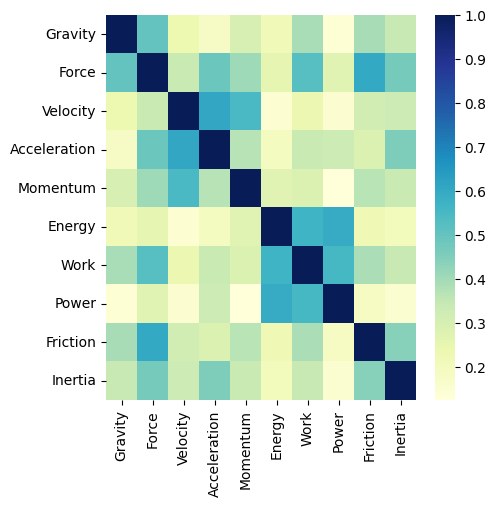

In [ ]:
df = calculate_heat_matrix_for_phrases()
fig, ax = plt.subplots(figsize=(5,5))
ax_blue = sns.heatmap(df, cmap="YlGnBu")

# DATA PREPROCESSING

---

## Extract text from the PDFs
---

Note: We will use a Langchain package (PyPDFLoader) for this.  Let's EXPERIMENT HERE!

In [ ]:
import os
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import CharacterTextSplitter
import arxiv
sys.path.append(FolderPath_Colab)
from config import VECTORDB_DIR_PATH, DATA_DIR_PATH

## We will start by downloading papers from Arxiv

---

In [ ]:
client = arxiv.Client()

# Search for the 6 most recent articles matching the keyword "quantum."
search = arxiv.Search(
  query = "quantum",
  max_results = 6,
  sort_by = arxiv.SortCriterion.SubmittedDate, # Other sort_by options are Relevance, and LastUpdatedDate
)

In [ ]:
search

arxiv.Search(query='quantum', id_list=[], max_results=10, sort_by=<SortCriterion.SubmittedDate: 'submittedDate'>, sort_order=<SortOrder.Descending: 'descending'>)

In [ ]:
results = client.results(search)
# `results` is a generator; you can iterate over its elements one by one...
for r in client.results(search):
  print(r.title)

#   # ...or exhaust it into a list. Careful: this is slow for large results sets.
# all_results = list(results)
# print([r.title for r in all_results])

Two-Peak Heat Capacity Accounts for $R\ln(2)$ Entropy and Ground State Access in the Dipole-Octupole Pyrochlore Ce$_2$Hf$_2$O$_7$
Quantum vortices leave a macroscopic signature in the normal fluid
Generalized entropy of gravitational fluctuations
Low-Temperature Gibbs States with Tensor Networks
Non-Hermitian Effects in the Su-Schrieffer-Heeger model: Exploring Substrate Coupling and Decoupling Dynamics
Surface and Bulk Two-Level System Losses in Lithium Niobate Acoustic Resonators
Frequency Fluctuations in Nanomechanical Resonators due to Quantum Defects
Revisiting the shadow of Johannsen-Psaltis black holes
Integer Quantum Hall Effect: Disorder, temperature, floating, and plateau width
Quantum wormholes at the end of the world


In [ ]:
for i, r in enumerate(client.results(search)):
  if i<1:
    print(r.summary)

We report new magnetic heat capacity measurements of a high quality single
crystal of the dipole-octupole pyrochlore Ce$_2$Hf$_2$O$_7$ down to a
temperature of $T = 0.02$ K, a factor of three lower than those previously
reported. These show a two-peaked structure, with a Schottky-like peak at $T_1
\sim 0.065$ K, similar to what is observed in its sister Ce-pyrochlores
Ce$_2$Zr$_2$O$_7$ and Ce$_2$Sn$_2$O$_7$. However a second, sharper peak is
observed at $T_2 \sim 0.025$ K, which signifies the entrance to its ground
state, as even the most abrupt low-temperature extrapolation to $C_P=0$ at $T =
0$ K gives a full accounting of $R\ln(2)$ in entropy, associated with the well
isolated pseudospin-1/2 doublet for Ce$^{3+}$ in this environment. The ground
state could be conventionally ordered, although theory predicts a much larger
anomaly in $C_P$, at much higher temperatures than the measured $T_2$, for
expectations from an all-in all-out ground state of the nearest-neighbor XYZ
Hamiltonian 

In [ ]:
for i, r in enumerate(client.results(search)):
  print([str(author) for author in r.authors])

['E. M. Smith', 'A. Fitterman', 'R. Schäfer', 'B. Placke', 'A. Woods', 'S. Lee', 'S. H. -Y. Huang', 'S. Sharma', 'J. Beare', 'D. Chatterjee', 'C. Balz', 'M. B. Stone', 'A. I. Kolesnikov', 'A. R. Wildes', 'P. Manuel', 'D. Khalyavin', 'E. Kermarrec', 'G. M. Luke', 'O. Benton', 'R. Moessner', 'R. Movshovich', 'A. D. Bianchi', 'B. D. Gaulin']
['Luca Galantucci', 'Giorgio Krstulovic', 'Carlo F Barenghi']
['Sean Colin-Ellerin', 'Guanda Lin', 'Geoff Penington']
['Denise Cocchiarella', 'Mari Carmen Bañuls']
['Shayan Edalatmanesh', 'Thomas Frederiksen']
['Rachel G. Gruenke-Freudenstein', 'Erik Szakiel', 'Gitanjali P. Multani', 'Takuma Makihara', 'Akasha G. Hayden', 'Ali Khalatpour', 'E. Alex Wollack', 'Antonia Akoto-Yeboah', 'Salva Salmani-Rezaie', 'Amir H. Safavi-Naeini']
['M. P. Maksymowych', 'M. Yuksel', 'O. A. Hitchcock', 'N. R. Lee', 'F. M. Mayor', 'W. Jiang', 'M. L. Roukes', 'A. H. Safavi-Naeini']
['Xinyu Wang', 'Zhixing Zhao', 'Xiao-Xiong Zeng', 'Xin-Yang Wang']
['Stuart Yi-Thomas', 'Yi 

## Download the PDFs

---

In [ ]:
!cd "$FolderPath_Colab"

In [ ]:
DATA_DIR_NAME = "Quantum"
if not os.path.exists(DATA_DIR_PATH):
    os.mkdir(f"{DATA_DIR_PATH}")
if not os.path.exists(os.path.join(DATA_DIR_PATH, DATA_DIR_NAME)):
    os.mkdir(os.path.join(DATA_DIR_PATH, DATA_DIR_NAME))

In [ ]:
#For every result, download the pdf, and save it under the name of the paper.
titles_downloaded = []
for r in client.results(search):
  r.download_pdf(dirpath=f"{DATA_DIR_PATH}/{DATA_DIR_NAME}", filename=f"{r.title}.pdf")
  titles_downloaded.append(r.title)

In [ ]:
SAMPLE_FILE_NAME = titles_downloaded[0]

### We initialize a PdfLoader, and load the contents of a single PDF to view

---

In [ ]:
sample_file_path = f"{DATA_DIR_PATH}/{DATA_DIR_NAME}/{SAMPLE_FILE_NAME}.pdf"
# initialize a loader of a single file.  This will allow us to load file content from the pdf as a Document (Langchain object containing string content and metadata).
loader = PyPDFLoader(
    file_path = sample_file_path,
)

In [ ]:
loader.load()

[Document(metadata={'source': './arxiv_data/Quantum/Two-Peak Heat Capacity Accounts for $R\\ln(2)$ Entropy and Ground State Access in the Dipole-Octupole Pyrochlore Ce$_2$Hf$_2$O$_7$.pdf', 'page': 0}, page_content='Two-Peak Heat Capacity Accounts forRln(2) Entropy\nand Ground State Access in the Dipole-Octupole Pyrochlore Ce2Hf2O7\nE. M. Smith,1, 2 A. Fitterman,3, 4 R. Sch¨ afer,5 B. Placke,5 A. Woods,6 S. Lee,6 S. H.-Y. Huang,1 S. Sharma,1\nJ. Beare,1 D. Chatterjee,7 C. Balz,8, 9 M. B. Stone,9 A. I. Kolesnikov,9 A. R. Wildes,10 P. Manuel,8 D. Khalyavin,8\nE. Kermarrec,7 G. M. Luke,1, 2 O. Benton,5 R. Moessner,5 R. Movshovich,6 A. D. Bianchi,3, 4 and B. D. Gaulin 1, 2, 11\n1Department of Physics and Astronomy, McMaster University, Hamilton, Ontario L8S 4M1, Canada\n2Brockhouse Institute for Materials Research, McMaster University, Hamilton, Ontario L8S 4M1, Canada\n3D´ epartement de Physique, Universit´ e de Montr´ eal, Montr´ eal, Quebec H2V 0B3, Canada\n4Regroupement Qu´ eb´ ecois su

In [ ]:
docs = loader.load()
print(f"loader.load() returns a {type(docs)}")
print(f"A document is of type {type(docs[0])}")

loader.load() returns a <class 'list'>
A document is of type <class 'langchain_core.documents.base.Document'>


**TAKE NOTES ON THE ABOVE EXTRACTION**
- Automatically split by page
- Output is a list of Documents.  This is a Langchain object that stores metadata information such as the source path, and the page_contents, which is the text contents of the pdf as a string
- We can access these fields individually.  Uncomment the print statements below to demonstrate this:

In [ ]:
page_1_document = docs[0]

In [ ]:
print(f"Page 1 contents is: {page_1_document.page_content}")
print(f"Page 1 metadata is: {page_1_document.metadata}")

Page 1 contents is: Two-Peak Heat Capacity Accounts forRln(2) Entropy
and Ground State Access in the Dipole-Octupole Pyrochlore Ce2Hf2O7
E. M. Smith,1, 2 A. Fitterman,3, 4 R. Sch¨ afer,5 B. Placke,5 A. Woods,6 S. Lee,6 S. H.-Y. Huang,1 S. Sharma,1
J. Beare,1 D. Chatterjee,7 C. Balz,8, 9 M. B. Stone,9 A. I. Kolesnikov,9 A. R. Wildes,10 P. Manuel,8 D. Khalyavin,8
E. Kermarrec,7 G. M. Luke,1, 2 O. Benton,5 R. Moessner,5 R. Movshovich,6 A. D. Bianchi,3, 4 and B. D. Gaulin 1, 2, 11
1Department of Physics and Astronomy, McMaster University, Hamilton, Ontario L8S 4M1, Canada
2Brockhouse Institute for Materials Research, McMaster University, Hamilton, Ontario L8S 4M1, Canada
3D´ epartement de Physique, Universit´ e de Montr´ eal, Montr´ eal, Quebec H2V 0B3, Canada
4Regroupement Qu´ eb´ ecois sur les Mat´ eriaux de Pointe (RQMP), Quebec H3T 3J7, Canada
5Max Planck Institute for the Physics of Complex Systems,
N¨ othnitzer Straße 38, Dresden 01187, Germany
6Los Alamos National Laboratory, Los Al

## Text Splitting

---
**Notes On Splitting**

- Why Splitting?
    - *Your notes here*.

- Langchain supports common splitting methods:
https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/

- We will use Character Text Splitter, which splits on characters once the desired chunk length is reached (measured in CHARACTERS NOT TOKENS).

Play with the parameters below to get familiar with text splitting.

In [ ]:
character_text_splitter = CharacterTextSplitter(
    separator="\n", #The character sequence to split on
    chunk_size=1500, #Chunk size
    chunk_overlap=250, #Number of characters to overlap accross chunks
    length_function = len, #Specified that the chunk size refers to characters
)

In [ ]:
splitted_docs = character_text_splitter.split_documents(documents= docs)

In [ ]:
splitted_docs[1]

Document(metadata={'source': './arxiv_data/Quantum/Two-Peak Heat Capacity Accounts for $R\\ln(2)$ Entropy and Ground State Access in the Dipole-Octupole Pyrochlore Ce$_2$Hf$_2$O$_7$.pdf', 'page': 0}, page_content='10Institut Laue-Langevin, 71 Avenue des Martyrs CS 20156, 38042 Grenoble Cedex 9, France\n11Canadian Institute for Advanced Research, 661 University Avenue, Toronto, Ontario M5G 1M1, Canada.\n(Dated: January 15, 2025)\nWe report new magnetic heat capacity measurements of a high quality single crystal of the\ndipole-octupole pyrochlore Ce 2Hf2O7 down to a temperature of T = 0.02 K, a factor of three lower\nthan those previously reported. These show a two-peaked structure, with a Schottky-like peak at\nT1 ∼ 0.065 K, similar to what is observed in its sister Ce-pyrochlores Ce 2Zr2O7 and Ce2Sn2O7.\nHowever a second, sharper peak is observed at T2 ∼ 0.025 K, which signifies the entrance to its\nground state, as even the most abrupt low-temperature extrapolation to CP = 0 at T = 0 

### NOTES: What are the various test splitters?  When might you use each?

# RAG

## Run Llama Outside the Main Thread in Colab

Open the terminal inside the Colab cell by running: <br />
```
%xterm
```


Then run the following command in colab terminal to install Ollama: <br />
```
curl -fsSL https://ollama.com/install.sh | sh
```
Then run the following command in the Colab terminal to start Llama (You should see some progress bars appear after running the command. If no progress bars appear, try running the command again) <br />
```
ollama serve & ollama run llama3.1
```


If `Send a message (/? for help)` appears in the Colab terminal, the LLM is ready to use. You can return to the notebook cells, but leave the terminal open. <br />

(Optional) After you finish using this notebook, type `/bye` to exit the llama interface in Colab terminal. Then, run `ollama stop llama3.1` to stop llama.

- Reference: https://github.com/ParthaPRay/Ollama_GoogleColab_colabxterm_langchain

In [ ]:
# Open the Terminal Inside the Colab Cell
%xterm

Launching Xterm...

<IPython.core.display.Javascript object>

## A) Brief introduction to Retrieval

In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain.chains import StuffDocumentsChain
from langchain_core.prompts import PromptTemplate
from langchain import LLMChain

In [ ]:
sys.path.append(FolderPath_Colab)
from config import VECTORDB_DIR_PATH, DATA_DIR_PATH, MODEL_NAME
# import functions and global variables from a parent directory.
from common_functions import get_llm

In [ ]:
llm = get_llm(model_name=MODEL_NAME, temp=0.1, use_ollama=True)

## Create a vectorDB with data from PDFs in Data/Quantum folder

In [ ]:
DATA_DIR_NAME = "Quantum"

## We load the text will chunk all documents in the Quantum directory

---

In [ ]:
character_text_splitter = CharacterTextSplitter(
    separator="\n", #The character sequence to split on
    chunk_size=1000, #Chunk size
    chunk_overlap=200, #Number of characters to overlap accross chunks
    length_function = len, #Specified that the chunk size refers to characters
)

loader = PyPDFDirectoryLoader(path = f"{DATA_DIR_PATH}/{DATA_DIR_NAME}", silent_errors=False,)
splitted_docs = loader.load_and_split(text_splitter=character_text_splitter,)

In [ ]:
print(type(splitted_docs))
print(type(splitted_docs[0]))
print(splitted_docs[0])

<class 'list'>
<class 'langchain_core.documents.base.Document'>
page_content='Revisiting the shadow of Johannsen-Psaltis black holes
Xinyu Wang1,2, Zhixing Zhao1,2, Xiao-Xiong Zeng3,4∗, Xin-Yang Wang2,5∗
1 School of Physics and Astronomy, Beijing Normal University, Beijing 100875, China
2Key Laboratory of Multiscale Spin Physics (Ministry of Education), Beijing Normal University,
Beijing 100875, China
3 State Key Laboratory of Mountain Bridge and Tunnel Engineering, Chongqing Jiaotong University,
Chongqing 400074, China
4 Department of Mechanics, Chongqing Jiaotong University, Chongqing 400074, China
5 Faculty of Arts and Sciences, Beijing Normal University, Zhuhai 519087, China
Abstract
The Johannsen-Psaltis (JP) metric provides a robust framework for testing the “no-hair the-
orem” of astrophysical black holes due to the regular spacetime configuration around JP black
holes. Verification of this theorem through electromagnetic spectra often involves analyzing the
photon sphere near b

#### Initialize your vectordb

---

In [ ]:
vectordb = Chroma(
    embedding_function=embedding_model,
    persist_directory=f"./{VECTORDB_DIR_PATH}/{DATA_DIR_NAME}",
        # Where to save data locally, remove if not neccesary
    collection_metadata={"hnsw:space": "cosine"},
)

In [ ]:
vectordb.add_documents(splitted_docs)

['8c1ec1a6-894d-4b33-82c5-81078e70552b',
 '59f62dd7-c79f-4d94-83ee-cd542f276d74',
 '1f9c787f-c3fc-4db2-8773-35567f0a89cf',
 'dbf8653a-f891-4455-98ea-4825a118d067',
 '5d464025-13b8-4ec9-8660-af63cb022c46',
 '1da428fc-9ef4-420a-92d4-7ec04d16fdf8',
 'd65e196d-3cb1-4f29-bc79-2405d8efbc55',
 'b63da77c-7787-4151-91af-bd207ff9e530',
 'a5e4e547-0c57-42ac-b8d6-3b23c3074cdd',
 '303b525e-0950-4b67-908d-b6eca6d07fab',
 'b3c38382-1dca-429e-89ad-ffebfb26d51b',
 'b59974b4-42b2-47d1-b815-2cb7a9a1f932',
 '66a62f8c-4126-4426-aca6-d3e114e5123a',
 'b2174b22-3739-48ed-91e2-ccd2472942b7',
 'ccc68ebf-48e3-4ade-98f4-dc15a7603678',
 'baeebfb6-a1cd-44b9-a694-4dd0a76e9a66',
 'c7dec7c4-8042-4796-9906-f47e6ab9d386',
 '1942b4a5-47f3-480b-9680-07afed0cc153',
 'd7d8366d-527a-4ccf-ab7d-38eac19972a2',
 'b52e78e3-59bb-4733-b0f1-73e78585cebd',
 'f336406d-0013-4370-86ba-6b21d1e171ac',
 'dda61cca-5cd1-4de3-849b-d6092af29ec5',
 '92ed9004-cff4-4f63-9f9b-a4ae43f4d6cc',
 '0b64ecc6-f33f-4bbc-ae68-b5ef2308cc1d',
 '5d6b55b9-69c3-

### NOTES ON VECTORDB CONTENTS
- Each embedding is assigned a unique ID.
- collection_metadata: Is where we specify kwargs for the collection (i.e. vector db) such as the similarity function used

## Why RAG?

In [ ]:
question = """What is the most recent published artice regarding Quantum uncertainty in the area of a black hole?"""

In [ ]:
llm.invoke(question)

KeyboardInterrupt: 

## Oh no! The model doesn't have access to our data!

In [ ]:
vectordb = Chroma(
    embedding_function=embedding_model,
    persist_directory=f"./{VECTORDB_DIR_PATH}/{DATA_DIR_NAME}",
        # Where to save data locally, remove if not neccesary
    collection_metadata={"hnsw:space": "cosine"},
)

## B) Brute force RAG (so we can see what happens under the hood)

In [ ]:
most_relevant = vectordb.similarity_search_with_relevance_scores(query= question,
                                                 k =3, # This parameter controls how many chunks you get from the vectordb that are similar to your query
                                                 score_threshold = 0.1, # This parameter controls how close the chunks need to be to be considered relevant.  1 = same vector, 0 = Far
                                                 )

In [ ]:
for doc in most_relevant:
    print(doc, "\n\n")

(Document(metadata={'page': 0, 'source': '/content/SFL_ReAct_PhysicsResearchAssistant-dev-setup_refinement/Prerequisites/RAGIntro/Data/Quantum/Quantum uncertainty in the area of a black hole.pdf'}, page_content='Prepared for submission to JHEP\nQuantum uncertainty in the area of a black hole\nMaulik Parikh,a,b Jude Pereiraa\naDepartment of Physics, Arizona State University, Tempe, Arizona 85287, USA\nbBeyond: Center for Fundamental Concepts in Science, Arizona State University, Tempe, Arizona\n85287, USA\nE-mail: maulik.parikh@asu.edu, jude.pereira@asu.edu\nAbstract: Quantum fluctuations of the spacetime metric induce an uncertainty in the\nhorizon area of a black hole. Working in linearized quantum gravity, we derive the variance\nin the area of a four-dimensional Schwarzschild black hole from the renormalized graviton\npropagator. We find that the standard deviation of the horizon area scales as the product of\nthe Schwarzschild radius and the Planck length. For macroscopic black hol

In [ ]:
most_relevant_content = most_relevant[0][0].page_content #change the indi
print(most_relevant_content)

Prepared for submission to JHEP
Quantum uncertainty in the area of a black hole
Maulik Parikh,a,b Jude Pereiraa
aDepartment of Physics, Arizona State University, Tempe, Arizona 85287, USA
bBeyond: Center for Fundamental Concepts in Science, Arizona State University, Tempe, Arizona
85287, USA
E-mail: maulik.parikh@asu.edu, jude.pereira@asu.edu
Abstract: Quantum fluctuations of the spacetime metric induce an uncertainty in the
horizon area of a black hole. Working in linearized quantum gravity, we derive the variance
in the area of a four-dimensional Schwarzschild black hole from the renormalized graviton
propagator. We find that the standard deviation of the horizon area scales as the product of
the Schwarzschild radius and the Planck length. For macroscopic black holes, the quantum
uncertainty is therefore enormous in Planck units.
arXiv:2412.21160v1  [hep-th]  30 Dec 2024


In [ ]:
number_of_chunks_of_context_to_use = min(5, len(most_relevant))

prompt = f"""You are an expert in quantum physics.
You are provided information coming from the most recent published research in Quantum Physics.
Please use the information below to answer the question.
Do not make any assumptions and do not make anything up. Use only the context provided.

Information:
```
{most_relevant_content}
```

Question:
```
{question}
```

Answer: [Your answer goes here]
"""

In [ ]:
llm.invoke(prompt)

### What if the model did not get enough context.  We have options, a few are:
1) Stuff the top N retrievals into one string, and use that as context (in Langchain: StuffDocumentsChain)
2) Loop over each document, retaining the previous response until a determined stopping point (in Langchain: RefineDocumentsChain)
2) Summarize the content from the retreivals and use that as context (in Langchain: ReduceDocumentsChain)

#### Below, we see brute force implementation of StuffDocumentsChain

In [ ]:
most_relevant = vectordb.similarity_search_with_relevance_scores(query= question,
                                                 k =10, # This parameter controls how many chunks you get from the vectordb that are similar to your query
                                                 score_threshold = 0.1, # This parameter controls how close the chunks need to be to be considered relevant.  1 = same vector, 0 = Far
                                                 )

In [ ]:
most_relevant

[(Document(metadata={'page': 0, 'source': '/content/SFL_ReAct_PhysicsResearchAssistant-dev-setup_refinement/Prerequisites/RAGIntro/Data/Quantum/Quantum uncertainty in the area of a black hole.pdf'}, page_content='Prepared for submission to JHEP\nQuantum uncertainty in the area of a black hole\nMaulik Parikh,a,b Jude Pereiraa\naDepartment of Physics, Arizona State University, Tempe, Arizona 85287, USA\nbBeyond: Center for Fundamental Concepts in Science, Arizona State University, Tempe, Arizona\n85287, USA\nE-mail: maulik.parikh@asu.edu, jude.pereira@asu.edu\nAbstract: Quantum fluctuations of the spacetime metric induce an uncertainty in the\nhorizon area of a black hole. Working in linearized quantum gravity, we derive the variance\nin the area of a four-dimensional Schwarzschild black hole from the renormalized graviton\npropagator. We find that the standard deviation of the horizon area scales as the product of\nthe Schwarzschild radius and the Planck length. For macroscopic black ho

In [ ]:
number_of_chunks_of_context_to_use = min(5, len(most_relevant))

prompt = f"""You are an expert in quantum physics.
You are provided information coming from the most recent published research in Quantum Physics.
Please use the information below to answer the question.
Do not make any assumptions and do not make anything up. Use only the context provided.

Information:
```
{"".join([most_relevant[i][0].page_content for i in range(number_of_chunks_of_context_to_use)])}
```

Question:
```
{question}?
```

Answer: [Your answer goes here]
"""

In [ ]:
llm.invoke(prompt)

' The most recent article regarding Quantum uncertainty in the area of a black hole is titled "Quantum uncertainty in the area of a black hole" and was prepared for submission to JHEP by Maulik Parikh and Jude Pereira. The article can be found on arXiv with the identifier [hep-th] 2412.21160v1, and it was published on December 30, 2024. In this paper, the authors derive the variance in the area of a four-dimensional Schwarzschild black hole from the renormalized graviton propagator and find that the standard deviation of the horizon area scales as the product of the Schwarzschild radius and the Planck length.'

# Using Methods Provided by Langchain:

In [ ]:
prompt_template = PromptTemplate(template="""You are an expert in quantum physics.
You are provided information coming from the most recent published research in Quantum Physics.
Please use the information below to answer the question.


Information:
```
{content}
```

Question:
```
{question}
```

Instructions:
```
Use only the information provided to answer the question.  Respond as accurately as possible using only the context provided.  Do not make anything up.
```

Answer: [Your answer goes here]
""", input_variables= ["content", "question"])

In [ ]:
prompt = prompt_template.invoke({"content": "".join([most_relevant[i][0].page_content for i in range(number_of_chunks_of_context_to_use)]), "question": question})

In [ ]:
print(prompt)

text='You are an expert in quantum physics.  \nYou are provided information coming from the most recent published research in Quantum Physics.\nPlease use the information below to answer the question.\n\n\nInformation:\n```\nPrepared for submission to JHEP\nQuantum uncertainty in the area of a black hole\nMaulik Parikh,a,b Jude Pereiraa\naDepartment of Physics, Arizona State University, Tempe, Arizona 85287, USA\nbBeyond: Center for Fundamental Concepts in Science, Arizona State University, Tempe, Arizona\n85287, USA\nE-mail: maulik.parikh@asu.edu, jude.pereira@asu.edu\nAbstract: Quantum fluctuations of the spacetime metric induce an uncertainty in the\nhorizon area of a black hole. Working in linearized quantum gravity, we derive the variance\nin the area of a four-dimensional Schwarzschild black hole from the renormalized graviton\npropagator. We find that the standard deviation of the horizon area scales as the product of\nthe Schwarzschild radius and the Planck length. For macrosco

In [ ]:
llm.invoke(prompt)

' The most recent article regarding Quantum uncertainty in the area of a black hole is titled "Quantum uncertainty in the area of a black hole" and was prepared for submission to JHEP by Maulik Parikh and Jude Pereira. The article can be found on arXiv with the identifier [hep-th] 30 Dec 2024 under the title arXiv:2412.21160v1. In this paper, the authors derive the variance in the area of a four-dimensional Schwarzschild black hole from the renormalized graviton propagator and find that the standard deviation of the horizon area scales as the product of the Schwarzschild radius and the Planck length (∆A ∼ rHlP).'

#### It gets even better!

#### D) Langchain allows you to chain outputs of any functins with a `.invoke` method.  This is the true power of Langchain




In [ ]:
llm_chain = LLMChain(llm = llm,
                     prompt = prompt_template,)

llm_chain.invoke({"content": most_relevant[0][0].page_content,
                  "question": question})

/tmp/ipykernel_35586/1016986344.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(llm = llm,


{'content': 'Prepared for submission to JHEP\nQuantum uncertainty in the area of a black hole\nMaulik Parikh,a,b Jude Pereiraa\naDepartment of Physics, Arizona State University, Tempe, Arizona 85287, USA\nbBeyond: Center for Fundamental Concepts in Science, Arizona State University, Tempe, Arizona\n85287, USA\nE-mail: maulik.parikh@asu.edu, jude.pereira@asu.edu\nAbstract: Quantum fluctuations of the spacetime metric induce an uncertainty in the\nhorizon area of a black hole. Working in linearized quantum gravity, we derive the variance\nin the area of a four-dimensional Schwarzschild black hole from the renormalized graviton\npropagator. We find that the standard deviation of the horizon area scales as the product of\nthe Schwarzschild radius and the Planck length. For macroscopic black holes, the quantum\nuncertainty is therefore enormous in Planck units.\narXiv:2412.21160v1  [hep-th]  30 Dec 2024',
 'question': 'What is the most recent published artice regarding Quantum uncertainty i

#### D) We can even chain everything together

In [ ]:
# Perform similarity search to get relevant contents from vectordb
input_documents = vectordb.similarity_search(question, k=3)

# Use langchain methods to Stuff this contents into one prompt
document_prompt = PromptTemplate(
            input_variables=["page_content"], template="{page_content}"
        )
stuff_chain = StuffDocumentsChain(
            llm_chain= LLMChain(llm = llm,
                                prompt = prompt_template,
                                verbose = True
                                ),
            document_prompt=document_prompt,
            document_variable_name="content",
        )

/tmp/ipykernel_35586/3310261694.py:8: LangChainDeprecationWarning: This class is deprecated. Use the `create_stuff_documents_chain` constructor instead. See migration guide here: https://python.langchain.com/docs/versions/migrating_chains/stuff_docs_chain/
  stuff_chain = StuffDocumentsChain(


In [ ]:
# Feed everything to the LLM
stuff_chain({"question": question,
             "input_documents": input_documents})

/tmp/ipykernel_35586/4070798310.py:2: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  stuff_chain({"question": question,




> Entering new LLMChain chain...
Prompt after formatting:
You are an expert in quantum physics.  
You are provided information coming from the most recent published research in Quantum Physics.
Please use the information below to answer the question.


Information:
```
Prepared for submission to JHEP
Quantum uncertainty in the area of a black hole
Maulik Parikh,a,b Jude Pereiraa
aDepartment of Physics, Arizona State University, Tempe, Arizona 85287, USA
bBeyond: Center for Fundamental Concepts in Science, Arizona State University, Tempe, Arizona
85287, USA
E-mail: maulik.parikh@asu.edu, jude.pereira@asu.edu
Abstract: Quantum fluctuations of the spacetime metric induce an uncertainty in the
horizon area of a black hole. Working in linearized quantum gravity, we derive the variance
in the area of a four-dimensional Schwarzschild black hole from the renormalized graviton
propagator. We find that the standard deviation of the horizon area scales as the product of
the Schwarzschild radius

{'question': 'What is the most recent published artice regarding Quantum uncertainty in the area of a black hole?',
 'input_documents': [Document(metadata={'page': 0, 'source': 'Data/Quantum/Quantum uncertainty in the area of a black hole.pdf'}, page_content='Prepared for submission to JHEP\nQuantum uncertainty in the area of a black hole\nMaulik Parikh,a,b Jude Pereiraa\naDepartment of Physics, Arizona State University, Tempe, Arizona 85287, USA\nbBeyond: Center for Fundamental Concepts in Science, Arizona State University, Tempe, Arizona\n85287, USA\nE-mail: maulik.parikh@asu.edu, jude.pereira@asu.edu\nAbstract: Quantum fluctuations of the spacetime metric induce an uncertainty in the\nhorizon area of a black hole. Working in linearized quantum gravity, we derive the variance\nin the area of a four-dimensional Schwarzschild black hole from the renormalized graviton\npropagator. We find that the standard deviation of the horizon area scales as the product of\nthe Schwarzschild radius 

#### CAUTION

The more that you chain, and use out of box Langchain functions, the less flexibility you will have!